In [1]:
# All the imports
import pandas as pd
import scipy.stats
import numpy
import numpy as np
import os
import glob
import matplotlib
import matplotlib.pyplot as plt

In [2]:
def mean_confidence_interval(data, confidence=0.95):
    """
    Calculates the mean and the confidence interval for a given list of values
    """

    a = 1.0 * numpy.array(data)
    n = len(a)
    m, se = numpy.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n - 1)
    return m, h

In [7]:
summary_files = [(x + '/' + x.split('/')[1] + '.csv', x.split('/')[1]) for x in glob.glob("results/*")]

table = []
series = {}
for summary_file in summary_files:
    protocol = summary_file[1].split('_')[3]
    packets = int(summary_file[1].split('_')[-1].split('-')[1])
    data = pd.read_csv(summary_file[0], sep='\t')
    result = mean_confidence_interval(list(data['syncLatency'].dropna()))
    row = {
        'protocol': protocol,
        'packets': packets,
        'mean': result[0],
        'confidence': result[1],
        'mean2': data['syncLatency'].mean(),
        'std': data['syncLatency'].std()
    }
    table.append(row)
    key = protocol + '_' + str(packets)
    if key not in series:
        series[key] = []
    series[key] = series[key] + list(data['syncLatency'].dropna())
df = pd.DataFrame(table)
df.sort_values(by=['protocol', 'packets'])

,protocol,packets,mean,confidence,mean2,std
2,QuadTree,10,58.793570,0.817196,58.793570,10.115336
4,QuadTree,10,306.209814,14.696492,306.209814,181.914582
15,QuadTree,10,125.324873,9.359449,125.324873,115.852153
1,QuadTree,100,76.792408,2.318839,76.792408,90.864912
3,QuadTree,100,81.602949,1.932324,81.602949,75.719112
20,QuadTree,100,114.819183,2.641497,114.819183,103.508433
5,QuadTree,200,504.368020,2.537669,504.368020,140.637698
16,QuadTree,200,184.666469,2.772859,184.666469,153.671958
18,QuadTree,200,524.485467,1.662953,524.485467,92.160896
0,QuadTree,500,403.277143,2.727863,403.277143,239.042473


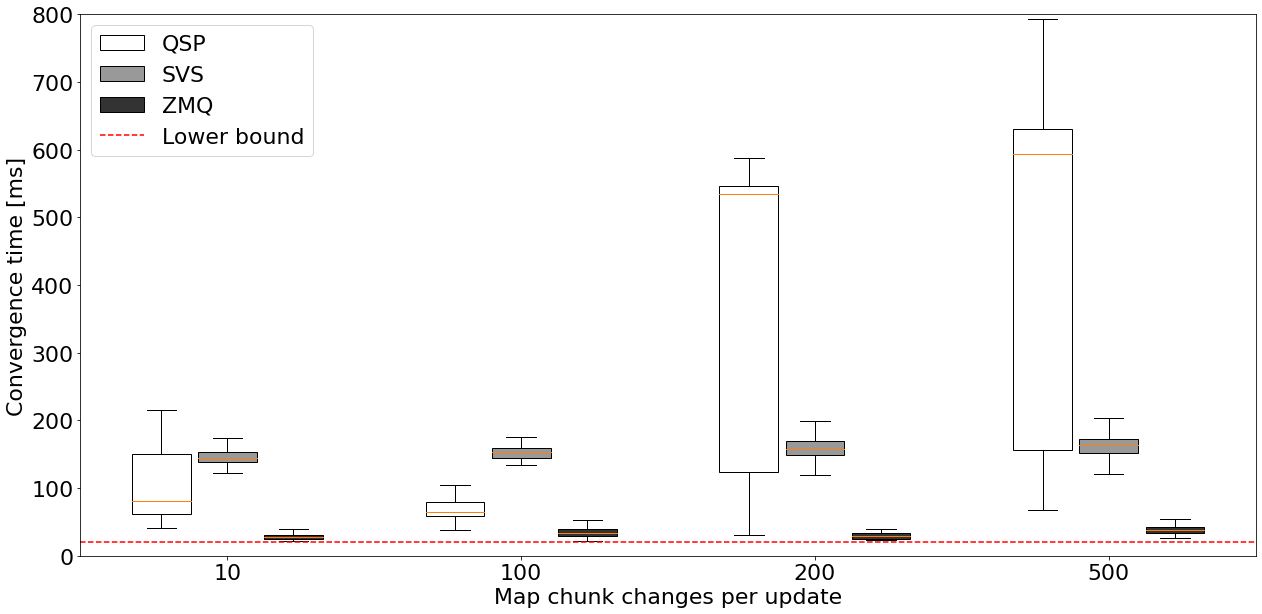

In [23]:
figure, axes = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 9)

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams.update({'font.size': 22})

data_10 = [series['QuadTree_10'], series['QuadTree250_10'], series['StateVector_10'], series['ZMQ_10']]
data_100 = [series['QuadTree_100'], series['QuadTree250_100'], series['StateVector_100'], series['ZMQ_100']]
data_200 = [series['QuadTree_200'], series['QuadTree250_200'], series['StateVector_200'], series['ZMQ_200']]
data_500 = [series['QuadTree_500'], series['QuadTree250_500'], series['StateVector_500'], series['ZMQ_500']]

data_qsp = [series['QuadTree_10'], series['QuadTree_100'], series['QuadTree_200'], series['QuadTree_500']]
data_qsp250 = [series['QuadTree250_10'], series['QuadTree250_100'], series['QuadTree250_200'], series['QuadTree250_500']]
data_svs = [series['StateVector_10'], series['StateVector_100'], series['StateVector_200'], series['StateVector_500']]
data_zmq = [series['ZMQ_10'], series['ZMQ_100'], series['ZMQ_200'], series['ZMQ_500']]

ticks = ['10', '100', '200', '500']

def set_box_color(bp, color):
    #plt.setp(bp['boxes'], color=color)
    #plt.setp(bp['whiskers'], color=color)
    #plt.setp(bp['caps'], color=color)
    #plt.setp(bp['medians'], color=color)
    for box in bp['boxes']:
        box.set_facecolor(color)

bp_qsp = plt.boxplot(data_qsp, positions=np.array(range(len(data_qsp)))*2.0-0.45, sym='', widths=0.4, patch_artist=True, boxprops=dict(facecolor="white"))
#bp_qsp250 = plt.boxplot(data_qsp250, positions=np.array(range(len(data_qsp250)))*2.0-0.2, sym='', widths=0.3, patch_artist=True, boxprops=dict(facecolor="#dddddd"))
bp_svs = plt.boxplot(data_svs, positions=np.array(range(len(data_svs)))*2.0, sym='', widths=0.4, patch_artist=True, boxprops=dict(facecolor="#999999"))
bp_zmq = plt.boxplot(data_zmq, positions=np.array(range(len(data_zmq)))*2.0+0.45, sym='', widths=0.4, patch_artist=True, boxprops=dict(facecolor="#333333"))

# 20 milliseconds lower bound
lower_bound = plt.axhline(y=20, color='red', linestyle='--')


# draw temporary red and blue lines and use them to create a legend
#plt.plot([], c='#D7191C', label='Apples')
#plt.plot([], c='#2C7BB6', label='Oranges')
plt.legend([
    bp_qsp["boxes"][0],
    #bp_qsp250["boxes"][0],
    bp_svs["boxes"][0],bp_zmq["boxes"][0], lower_bound], 
    ["QSP", 
     #"QSP (250 ms)",
     "SVS",
     "ZMQ", "Lower bound"])

plt.xticks(range(0, len(ticks) * 2, 2), ticks)
plt.xlim(-1, len(ticks)*2 - 1)
plt.ylim(0, 800)
plt.xlabel("Map chunk changes per update")
plt.ylabel("Convergence time [ms]")
#plt.ylim(0, 8)
plt.tight_layout()
plt.savefig('boxcompare.pdf')


In [22]:
print("QSP means")
print([np.mean(data_qsp[i]) for i in range(0, len(data_qsp))])
print("SVS means")
print([np.mean(data_svs[i]) for i in range(0, len(data_svs))])
print("ZMQ means")
print([np.mean(data_zmq[i]) for i in range(0, len(data_zmq))])

QSP means
[163.44275239706712, 91.07151330283003, 404.5066519786459, 438.7335683536151]
SVS means
[146.54991539763114, 152.3490933740044, 161.20574527582409, 164.19840005423546]
ZMQ means
[29.88135593220339, 36.08474576271186, 29.508474576271187, 38.847457627118644]
